# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


sumber data set dari Kaggle:

(3.1) Give Me Some Credit(gmsc): https://www.kaggle.com/c/GiveMeSomeCredit

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [5]:
import pandas as pd
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [8]:
import pandas as pd

train = pd.read_csv('Ekperimen_SML_Ida_Sri_Afiqah/dataset/s-training.csv')
test = pd.read_csv('Ekperimen_SML_Ida_Sri_Afiqah/dataset/cs-test.csv')
train, test

FileNotFoundError: [Errno 2] No such file or directory: 'Ekperimen_SML_Ida_Sri_Afiqah/dataset/s-training.csv'

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Informasi dataset train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  15000

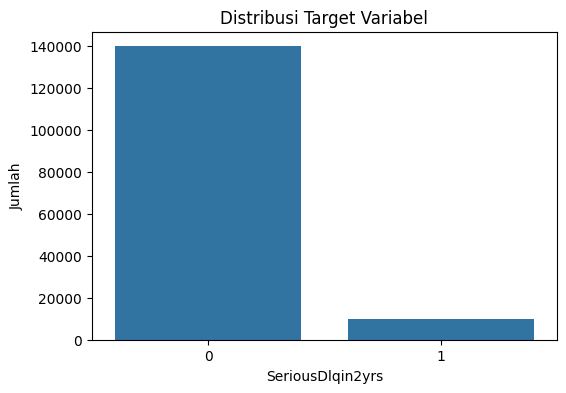

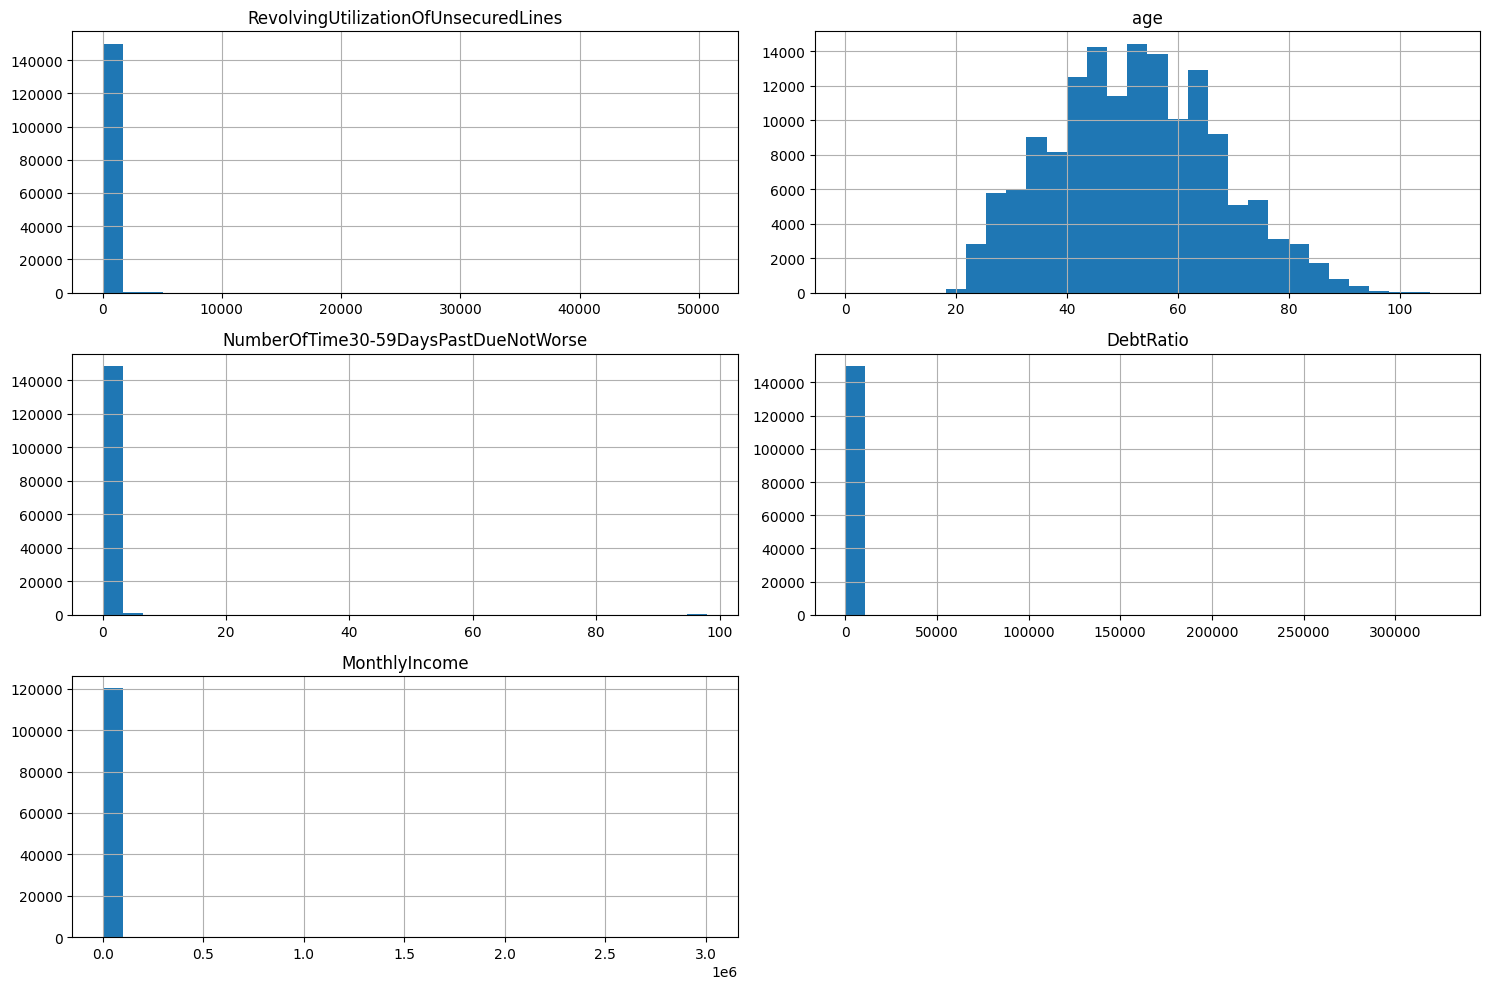

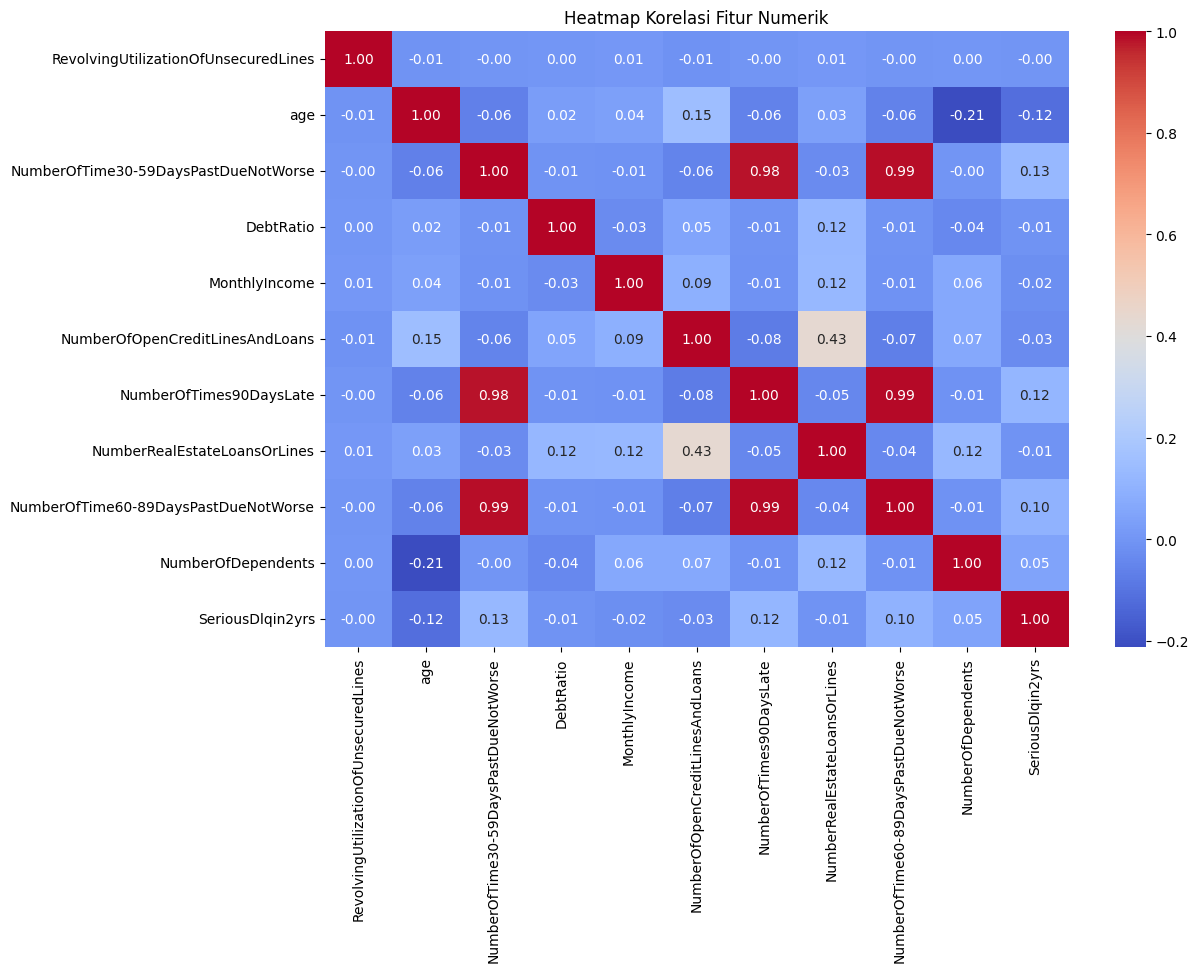

In [4]:
# prompt: lakukan Exploratory Data Analysis (EDA)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan informasi dasar dataset
print("Informasi dataset train:")
train.info()
print("\nInformasi dataset test:")
test.info()

# Menampilkan deskripsi statistik dataset
print("\nDeskripsi statistik dataset train:")
print(train.describe())
print("\nDeskripsi statistik dataset test:")
print(test.describe())

# Mengecek missing values
print("\nJumlah missing values pada dataset train:")
print(train.isnull().sum())
print("\nJumlah missing values pada dataset test:")
print(test.isnull().sum())

# Visualisasi distribusi target variabel (untuk dataset train)
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=train)
plt.title('Distribusi Target Variabel')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi beberapa kolom numerik (contoh)
numerical_cols = train.select_dtypes(include=np.number).columns.tolist()
# Hapus kolom target jika ada
if 'SeriousDlqin2yrs' in numerical_cols:
    numerical_cols.remove('SeriousDlqin2yrs')
# Hapus kolom index yang tidak relevan
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

if len(numerical_cols) > 0:
    # Pilih beberapa kolom untuk visualisasi agar tidak terlalu banyak plot
    cols_to_plot = numerical_cols[:5] # Ambil 5 kolom pertama
    train[cols_to_plot].hist(figsize=(15, 10), bins=30)
    plt.tight_layout()
    plt.show()

# Heatmap korelasi antar fitur numerik (untuk dataset train)
plt.figure(figsize=(12, 8))
correlation_matrix = train[numerical_cols + ['SeriousDlqin2yrs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# prompt: lakukan data preprocessing seperti di atas

# Hapus kolom 'Unnamed: 0' yang tampaknya merupakan indeks tidak relevan
train = train.drop('Unnamed: 0', axis=1)
test = test.drop('Unnamed: 0', axis=1)

# Menangani missing values
# Untuk kolom 'MonthlyIncome' dan 'NumberOfDependents', kita bisa mengisi missing values dengan median.
# Median lebih robust terhadap outliers dibandingkan mean.
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(train['MonthlyIncome'].median())
test['MonthlyIncome'] = test['MonthlyIncome'].fillna(test['MonthlyIncome'].median())

train['NumberOfDependents'] = train['NumberOfDependents'].fillna(train['NumberOfDependents'].median())
test['NumberOfDependents'] = test['NumberOfDependents'].fillna(test['NumberOfDependents'].median())

# Mengecek kembali missing values setelah penanganan
print("\nJumlah missing values pada dataset train setelah penanganan:")
print(train.isnull().sum())
print("\nJumlah missing values pada dataset test setelah penanganan:")
print(test.isnull().sum())


# Menangani outliers pada kolom 'age' dan 'NumberOfTime30-59DaysPastDueNotWorst' (dan kolom-kolom dengan nilai ekstrem lainnya)
# Untuk 'age', nilai 0 tampaknya merupakan data yang salah. Kita bisa menghapusnya atau menggantinya dengan nilai lain (misal: median).
# Untuk kasus ini, kita akan menghapus baris dengan age = 0 pada data train.
train = train[train['age'] > 0]

# Untuk kolom-kolom seperti 'NumberOfTime30-59DaysPastDueNotWorst', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorst',
# ada nilai-nilai yang sangat besar (misal 96, 98). Ini kemungkinan outliers atau nilai khusus yang menandakan sesuatu.
# Untuk tujuan pemodelan awal, kita bisa membatasi nilai-nilai ini pada threshold tertentu atau membiarkannya tergantung pada strategi model.
# Jika kita memutuskan untuk membatasi, kita bisa mengganti nilai-nilai ekstrem dengan threshold atau median/mean dari nilai yang wajar.
# Untuk saat ini, kita akan membiarkan nilai-nilai ekstrem tersebut, namun perlu diingat untuk eksplorasi lebih lanjut.

# Kolom 'DebtRatio' juga bisa memiliki nilai ekstrem. Tidak ada penanganan khusus untuk saat ini.
# Kolom 'RevolvingUtilizationOfUnsecuredLines' juga bisa memiliki nilai > 1, ini normal dalam konteks rasio kredit.

# Tidak ada data kategorikal yang perlu di-encode pada dataset ini.
# Binning tidak diperlukan untuk model klasifikasi standar pada dataset ini.

# Menghapus data duplikat
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"\nUkuran dataset train setelah menghapus duplikat: {train.shape}")
print(f"Ukuran dataset test setelah menghapus duplikat: {test.shape}")

# Tidak ada normalisasi/standarisasi eksplisit dilakukan di sini,
# namun mungkin diperlukan tergantung pada model machine learning yang digunakan.
# Beberapa model sensitif terhadap skala fitur (misal: SVM, K-NN),
# sementara model lain (misal: Tree-based models) tidak terlalu sensitif.

print("\nSampel data train setelah preprocessing:")
print(train.head())
print("\nSampel data test setelah preprocessing:")
print(test.head())


Jumlah missing values pada dataset train setelah penanganan:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

Jumlah missing values pada dataset test setelah penanganan:
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLin